In [1]:
# Authors: Luisi et al. 2021, Riley Owens (GitHub: mrileyowens)

# This file creates a position-velocity diagram from a C-band
# RRL datacube.

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
from matplotlib.patches import Arc

from astropy.wcs import WCS
from astropy.wcs.wcsapi import SlicedLowLevelWCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy import constants as const
from astropy import units as u

from scipy.optimize import curve_fit
from scipy.ndimage import zoom
from scipy.stats import norm
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage import gaussian_filter1d
from scipy import odr

from skimage.transform import resize

In [3]:
# Function to create a dummy WCS used specifically for plotting
def makeWCS(coordAxType,hdr):
    if coordAxType=='lon':
        
        # Creating empty header to be filled with new WCS
        hdrPV=fits.Header()

        hdrPV['BITPIX']=hdr['BITPIX']

        # Setting number of axes and pixel length
        hdrPV['NAXIS']=2
        hdrPV['NAXIS1']=hdr['NAXIS1']
        hdrPV['NAXIS2']=hdr['NAXIS3']

        # Setting longitudinal axis of the WCS
        hdrPV['CRVAL1']=hdr['CRVAL1']
        hdrPV['CRPIX1']=hdr['CRPIX1']
        hdrPV['CDELT1']=hdr['CDELT1']

        # Setting velocity axis of the WCS
        hdrPV['CRVAL2']=hdr['CRVAL3']
        hdrPV['CRPIX2']=hdr['CRPIX3']
        hdrPV['CDELT2']=hdr['CDELT3']

        wcs=WCS(hdrPV)
        
        return wcs
    
    elif coordAxType=='lat':
        
        # Creating empty header to be filled with new WCS
        hdrPV=fits.Header()

        hdrPV['BITPIX']=hdr['BITPIX']

        # Setting number of axes and pixel length
        hdrPV['NAXIS']=2
        hdrPV['NAXIS1']=hdr['NAXIS2']
        hdrPV['NAXIS2']=hdr['NAXIS3']

        # Setting latitudinal axis of the WCS
        hdrPV['CRVAL1']=hdr['CRVAL2']
        hdrPV['CRPIX1']=hdr['CRPIX2']
        hdrPV['CDELT1']=hdr['CDELT2']

        # Setting velocity axis of the WCS
        hdrPV['CRVAL2']=hdr['CRVAL3']
        hdrPV['CRPIX2']=hdr['CRPIX3']
        hdrPV['CDELT2']=hdr['CDELT3']

        wcs=WCS(hdrPV)
        
        return wcs
    
# Function to collapse data along coordinate axis
def coll(data,coordAxType):
    if coordAxType=='lon':
        
        pvData=np.nansum(data,axis=1)
        
        return pvData
    
    elif coordAxType=='lat':
        
        pvData=np.nansum(data,axis=2)
        
        return pvData

In [4]:
# Establishing directories
home='/home/jovyan/work/custom'
data=home+'/data'
figs=home+'/figs'

In [5]:
# Setting the HDU and extracting the header, data, and WCS
hdu=fits.open(data+'/G80.74_-0.12_regrid_smo_avg_line_cut_bl_drop.fits')[0]
hdr=hdu.header
data=hdu.data
wcs=WCS(hdr)

In [6]:
# Summing data along a coordinate axis
pvData=coll(data,'lon')

# Reassigning values to prevent NaNs
pvData[pvData<0]=0.0000001

# Using a logarithmic scale after applying a Gaussian filter
pvDataLog=np.log(gaussian_filter(pvData, 1.7))

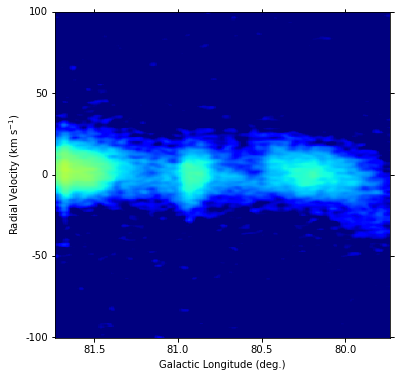

In [7]:
# Initialize figure
plt.close('all')
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,projection=makeWCS('lon',hdr))

# Plot position-velocity array
ax.imshow(pvDataLog, vmin=0, vmax=5, origin='lower', cmap='jet', interpolation='none', aspect='auto')

# Label the image axes
plt.xlabel('Galactic Longitude (deg.)')
plt.ylabel('Radial Velocity (km s$^{-1}$)')

plt.savefig(figs+'/pvLon8074-0012.png',bbox_inches='tight',dpi=1000)